In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RingAttractorModel

In [2]:

parameters = {'w_EE': 0.72, 'w_EI': 0.14, 'w_IE': 0.74, 'w_II': 0.01, 'w_EP': 0.01, 'w_PE': 0.71, 'w_PP': 0.01}
p = RingAttractorModel.Parameters(**parameters)

r = RingAttractorModel.Simulator(parameters=p)

In [ ]:
r.run(t_epg_open=200,t_epg_close=500,t_pen_open=1000,stimulus_strength=0.05,stimulus_location=np.deg2rad(0),shifter_strength=0.014,half_PEN='right')

03:37:09 [info] All connections done
03:37:09 [info] Testing stability
03:37:14 [info] Testing shifting simulation
03:37:20 : 0 min 11.2 sec -> eval end
03:37:20 [info] All connections done
03:37:20 [info] Testing stability
03:37:25 [info] Testing shifting simulation
03:37:31 : 0 min 11.2 sec -> eval end
03:37:31 [info] All connections done
03:37:31 [info] Testing stability
03:37:36 [info] Testing shifting simulation
03:37:42 : 0 min 11.1 sec -> eval end
03:37:42 [info] All connections done
03:37:42 [info] Testing stability
03:37:47 [info] Testing shifting simulation
03:37:53 : 0 min 11.2 sec -> eval end
03:37:54 [info] All connections done
03:37:54 [info] Testing stability
03:37:59 [info] Testing shifting simulation
03:38:05 : 0 min 11.3 sec -> eval end
03:38:05 [info] All connections done
03:38:05 [info] Testing stability
03:38:10 [info] Testing shifting simulation
03:38:16 : 0 min 11.2 sec -> eval end
03:38:16 [info] All connections done
03:38:16 [info] Testing stability
03:38:21 [i

In [11]:
parameters = {'w_EE': 0.719, 'w_EI': 0.143, 'w_IE': 0.74, 'w_II': 0.01, 'w_EP': 0.0, 'w_PE': 0.0, 'w_PP': 0.0, 'sigma': 0.001}
# parameters = {'w_EE': 0.719, 'w_EI': 0.143, 'w_IE': 0.74, 'w_II': 0.01, 'w_EP': 0.012, 'w_PE': 0.709, 'w_PP': 0.01, 'sigma': 0.001}

p = RingAttractorModel.Parameters(**parameters)

r = RingAttractorModel.Simulator(parameters=p)

r.run(t_epg_open=200,
      t_epg_close=300,
      t_pen_open=1000,
      stimulus_strength=0.03,
      stimulus_location=0,
      shifter_strength=0.0150, # 0.0128
      half_PEN='right')
r.fit_gaussian()
r.fit_velocity() 


03:18:48 [info] All connections done


100%|██████████| 100/100 [00:52<00:00,  1.92it/s]

03:19:40 : 0 min 52.3 sec -> eval end


(-0.02907899999999987,
 0.24509723865564573,
 0.029464232842549915,
 0.0036442680522761244)

-0.02907899999999987


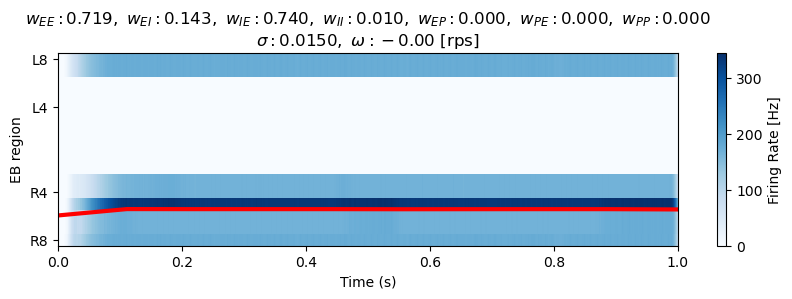

In [13]:
title = (
    rf'$w_{{EE}}:{p.w_EE:.3f},\ w_{{EI}}:{p.w_EI:.3f},\ w_{{IE}}:{p.w_IE:.3f},\ '
    rf'w_{{II}}:{p.w_II:.3f},\ w_{{EP}}:{p.w_EP:.3f},\ w_{{PE}}:{p.w_PE:.3f},\ w_{{PP}}:{p.w_PP:.3f}$'
    '\n'
    rf'$\sigma:{.015:.4f},\ \omega:{r.rotations_per_second:.2f}\ \mathrm{{[rps]}}$'
)

r.plot_raw(title=title)

print(r.slope)

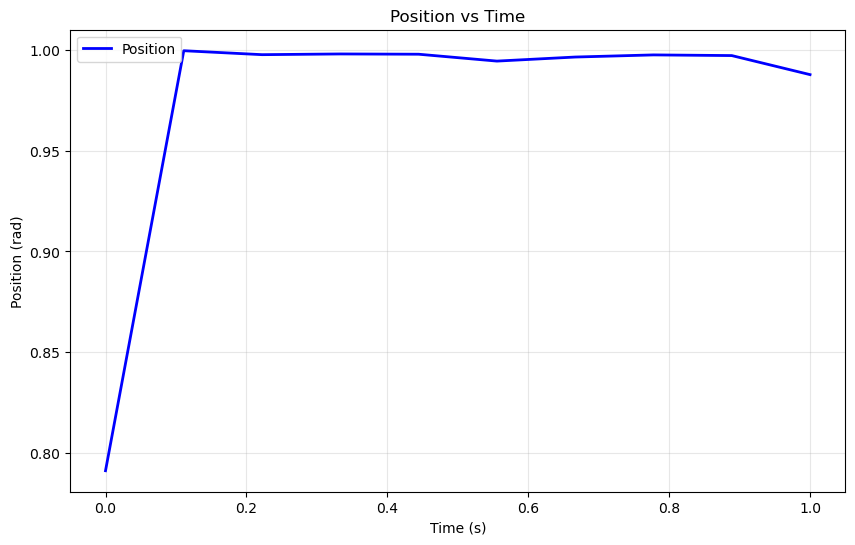

In [14]:
r.xt_plot(v=False)

In [15]:
r.fit_velocity()
r.summary()

Angular velocity:   -0.011 ±    0.012 [rad/s]
                    -0.654 ±    0.663 [deg/s]
Rotations/sec:      -0.002 ±    0.002 [Hz]
R-squared: 0.245
Average bump width: 91.754 ± 2.349 [deg]
Average firing rate: 244.000 ± 34.454 [Hz]
Network parameters:
  w_EE: 0.719
  w_EI: 0.143
  w_IE: 0.74
  w_II: 0.01
  w_EP: 0.0
  w_PE: 0.0
  w_PP: 0.0
  sigma: 0.001
Stimulus open time: 200 ms
Stimulus close time: 300 ms
PEN open time: 1000 ms
Stimulus strength: 0.03
Stimulus location: 0 rad
Shifter strength: 0.015
Half PEN: right


In [16]:
_eip_rg = {
    'original': [
        [1, 9, 0, 8],
        [1, 9, 10],
        [2, 10, 1],
        [2, 10, 11],
        [3, 11, 2],
        [3, 11, 12],
        [4, 12, 3],
        [4, 12, 13],
        [5, 13, 4],
        [5, 13, 14],
        [6, 14, 5],
        [6, 14, 15],
        [7, 15, 6],
        [7, 15, 16],
        [8, 16, 7],
        [8, 16, 17, 9]],
    'symmetry': [
        [0, 1, 17],
        [1, 17, 10],
        [1, 2, 10],
        [2, 10, 11],
        [2, 3, 11],
        [3, 11, 12],
        [3, 4, 12],
        [4, 12, 13],
        [4, 5, 13],
        [5, 13, 14],
        [5, 6, 14],
        [6, 14, 15],
        [6, 7, 15],
        [7, 15, 16],
        [7, 0, 16],
        [0, 16, 17]]
}

_WEIGHT_MATRICES = {}
for circuit, groups in _eip_rg.items():
    W = np.zeros((18, len(groups)), dtype=float)
    for j, idx_list in enumerate(groups):
        w = 1.0 / len(idx_list)
        W[idx_list, j] = w
    _WEIGHT_MATRICES[circuit] = W

def eip_to_eb_fast(eip_fr: np.ndarray, circuit: str = 'symmetry') -> np.ndarray:
    eip = np.asarray(eip_fr)
    W = _WEIGHT_MATRICES[circuit]
    eb_fr = eip.dot(W)
    return eb_fr

def plot_original(t, fr, title=None, file_name=None, region='EB', y_label='Time (s)', cmap='Blues', 
            save=False, folder='figures', plot_gau=True, figsize=(10, 2.5), eip2eb=True):
    
    if eip2eb:
        fr_with_zeros = np.zeros((fr.shape[0], fr.shape[1] + 2))
        fr_with_zeros[:, :8] = fr[:, :8]
        fr_with_zeros[:, 10:] = fr[:, 8:]
        eb_fr = eip_to_eb_fast(fr_with_zeros)
        eb_fr = eb_fr.T
    else:
        eb_fr = fr
        
    plt.figure(figsize=figsize)
    plt.pcolormesh(t, [i for i in range(eb_fr.shape[0])], eb_fr, cmap=cmap, shading='nearest')
    plt.colorbar(label='Firing Rate [Hz]')    
    plt.title(title)
    plt.xlabel(y_label)
    plt.ylabel('EB region' if region == 'EB' else 'Neuron ID')
    plt.yticks([0, 4, 11, 15], ['R8', 'R4', 'L4', 'L8'] if region == 'EB' else [0, 5, 10, 15])

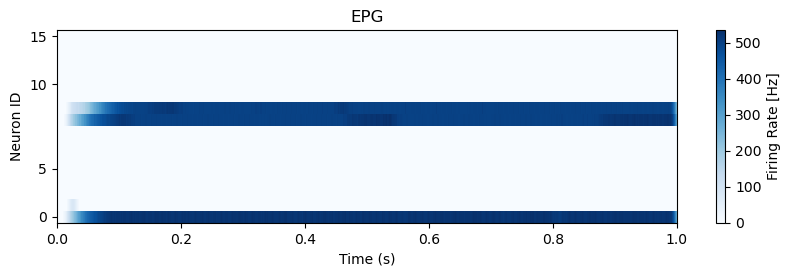

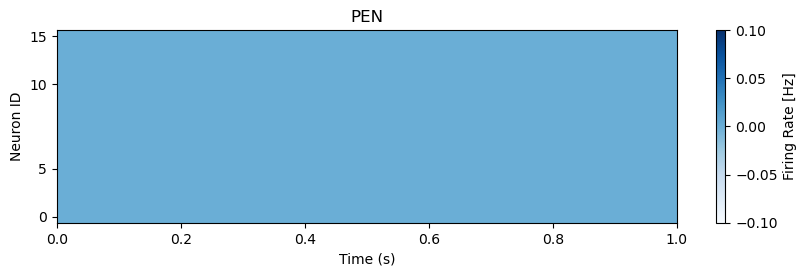

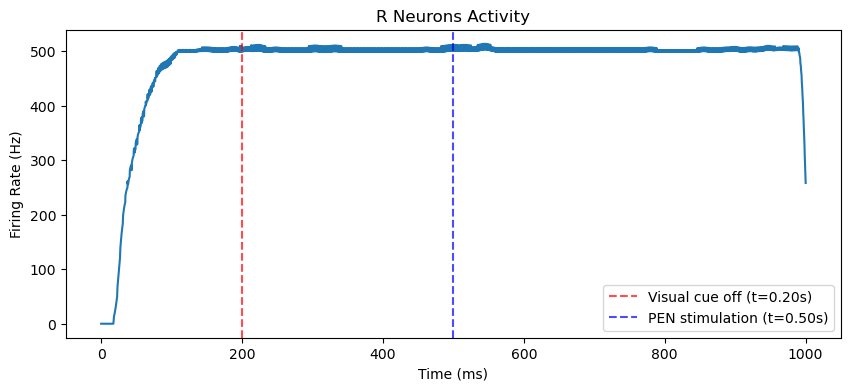

In [17]:
plot_original(r.time, r.fr, eip2eb = False, region=None, title='EPG')
plot_original(r.time, r.fr_pen, eip2eb = False, region=None, title='PEN')

t1 = r.t_epg_open 
t2 = t1 + r.t_epg_close 

plt.figure(figsize=(10, 4))
plt.plot(r.time*1000, r.fr_r.T)
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('R Neurons Activity')
plt.axvline(x=t1, color='red', linestyle='--', alpha=0.7, label=f'Visual cue off (t={t1/1000:.2f}s)')
plt.axvline(x=t2, color='blue', linestyle='--', alpha=0.7, label=f'PEN stimulation (t={t2/1000:.2f}s)')
plt.legend()


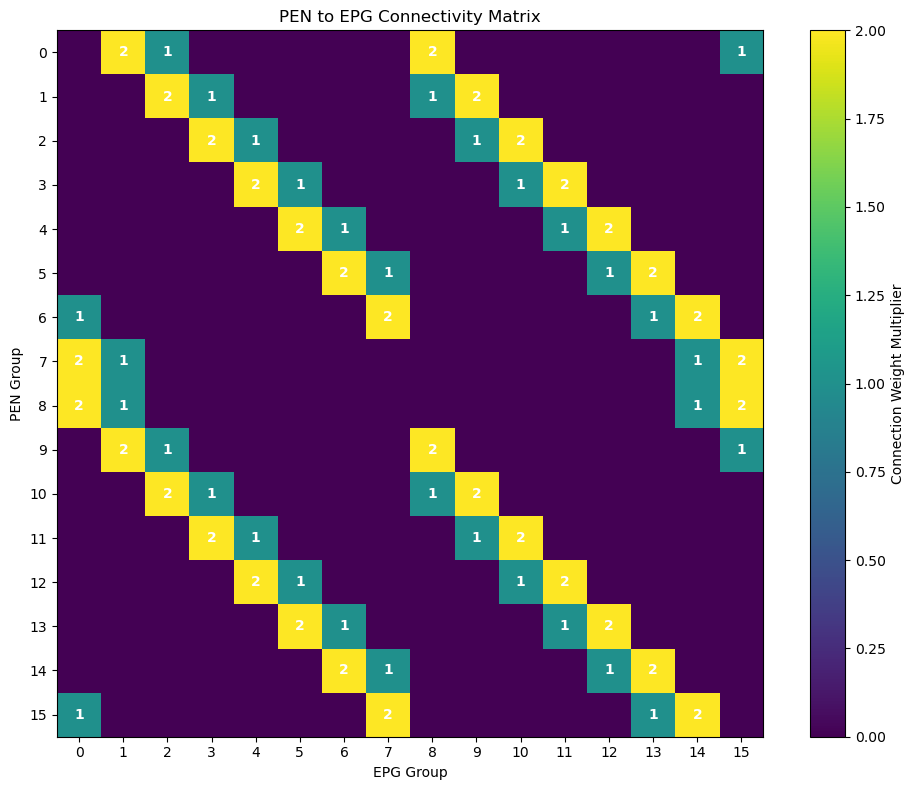

Total 2x weight connections: 288
Total 1x weight connections: 288
Total connections: 576


In [18]:
from connectivity import build_pen_to_epg_indices

pre2, post2, pre1, post1 = build_pen_to_epg_indices()
# Visualize the connectivity matrix
import matplotlib.pyplot as plt
import numpy as np

# Create a connectivity matrix to visualize PEN -> EPG connections
connectivity_matrix = np.zeros((16, 16))  # 16 PEN groups to 16 EPG groups

# Fill in the 2x weight connections
for i, j in zip(pre2, post2):
    pen_group = i // 3  # Convert neuron index to group index
    epg_group = j // 3  # Convert neuron index to group index
    connectivity_matrix[pen_group, epg_group] = 2

# Fill in the 1x weight connections
for i, j in zip(pre1, post1):
    pen_group = i // 3  # Convert neuron index to group index
    epg_group = j // 3  # Convert neuron index to group index
    if connectivity_matrix[pen_group, epg_group] == 0:  # Only if not already set to 2
        connectivity_matrix[pen_group, epg_group] = 1

# Plot the connectivity matrix
plt.figure(figsize=(10, 8))
plt.imshow(connectivity_matrix, cmap='viridis', aspect='equal')
plt.colorbar(label='Connection Weight Multiplier')
plt.xlabel('EPG Group')
plt.ylabel('PEN Group')
plt.title('PEN to EPG Connectivity Matrix')
plt.xticks(range(16))
plt.yticks(range(16))

# Add text annotations for non-zero values
for i in range(16):
    for j in range(16):
        if connectivity_matrix[i, j] > 0:
            plt.text(j, i, f'{int(connectivity_matrix[i, j])}', 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total 2x weight connections: {len(pre2)}")
print(f"Total 1x weight connections: {len(pre1)}")
print(f"Total connections: {len(pre2) + len(pre1)}")
